# LOAN ELIGIBILITY PREDICTION MODEL 🏦

## 🔎 UNDERSTANDING 🤔 / CLEANING 🧹 OF DATA  (Data Pre-processing)

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data = data.dropna()
data = data.drop(['Loan_ID'], axis=1)

In [12]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
data["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [14]:
data = data.replace(to_replace = "3+", value=3)

In [15]:
data["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

In [16]:
data.shape

(480, 12)

## 🔎 DATA VISUALIZATION (EDA) 🤩

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

### ᯓ★ Correlation Matrix

In [18]:
selected_column = ["ApplicantIncome","LoanAmount"]
selected = data[selected_column]
corr_matrix = selected.corr()

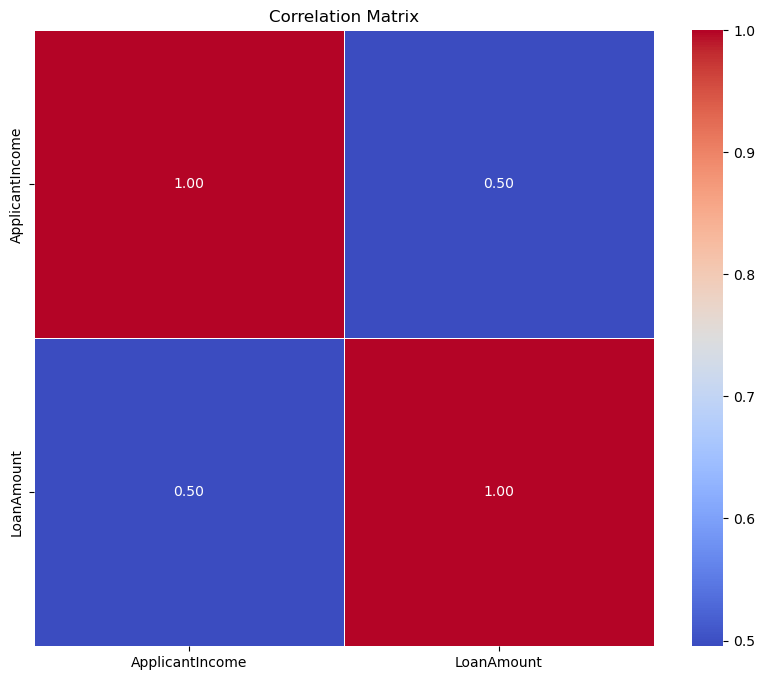

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### ᯓ★ Gender vs Loan Status

<Axes: xlabel='Gender', ylabel='count'>

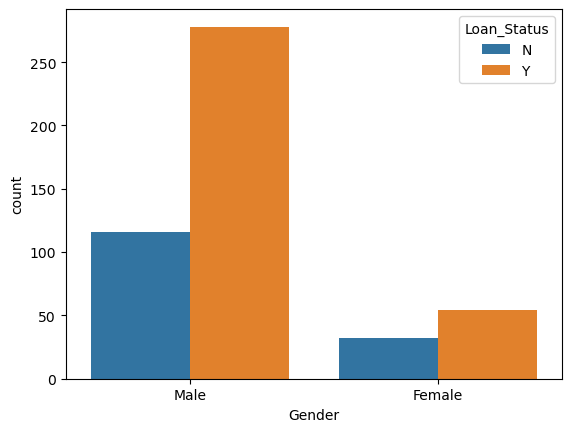

In [20]:
sns.countplot(x='Gender',hue='Loan_Status', data=data)

### ᯓ★ Married vs Loan Status

<Axes: xlabel='Married', ylabel='count'>

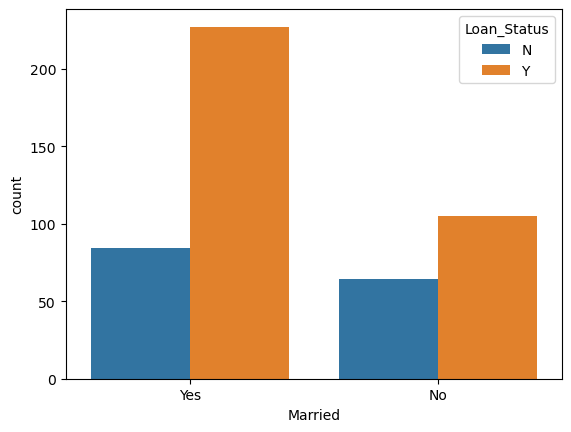

In [21]:
sns.countplot(x='Married',hue='Loan_Status', data=data)

### ᯓ★ Education vs Loan Status

<Axes: xlabel='Education', ylabel='count'>

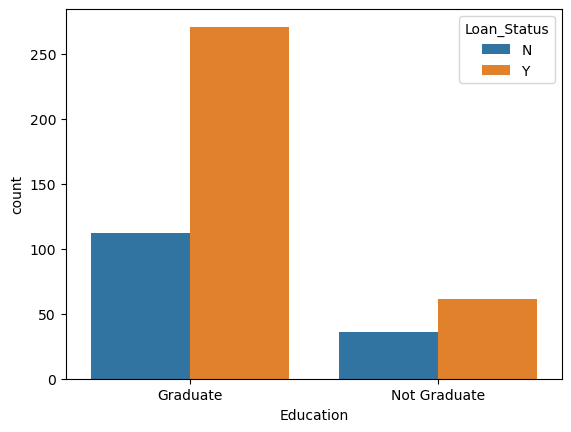

In [22]:
sns.countplot(x='Education',hue='Loan_Status', data=data)

## 🔎 FEATURE ENGINEERING 🫠

### ᯓ★ Label Encoding

In [23]:
data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [24]:
data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [25]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [26]:
data.shape

(480, 12)

### ᯓ★ Train Test split

In [27]:
X = data.drop(columns=['Loan_Status'],axis=1)
Y = data['Loan_Status']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


## 🔎 MODEL IMPLEMENTATION (SVC) 👨🏻‍💻

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [31]:
svm_classifier = SVC()
svm_classifier.fit(X_train,Y_train)

SVC()

### ᯓ★ Model prediction / Evalution

In [32]:
predictions = svm_classifier.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Model Accuracy:", accuracy_score(Y_test, predictions))

Model Accuracy: 0.6875


## MODEL ACCURACY IS 68 % ...🤫

In [34]:
p = svm_classifier.predict([[1.0,1.0,0.0,1,0.0,1811,1500,100.0,420.0,1.0,1]])

C:\Users\drstr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [35]:
print("Prediction:", p)

Prediction: [1]


In [38]:
import pickle

filename = 'svm_model.pkl'


with open(filename, 'wb') as file:
    pickle.dump(svm_classifier, file)

print("Model saved successfully as:", filename)

Model saved successfully as: svm_model.pkl


In [43]:
with open(filename, 'rb') as file:
    p = pickle.load(file)

In [44]:
p = p.predict([[1.0,0.0,1.0,1,0.0,1000,1.0,100.0,100.0,0.0,1]])
print(p)

[1]


C:\Users\drstr\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## NOW DEPLOYMENT PHASE 🥳